# By:- Chirag Singh

## The Sparks Foundation

## Data Science & Business Analytics Intern

### Prediction using Supervised ML

#### Data Source:- http://bit.ly/w-data

#### Problem Statement: predicted score if a student studies for 9.25 hrs/ day?

## Import libaries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import urllib

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#check the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Plot the data or Visualize the Data

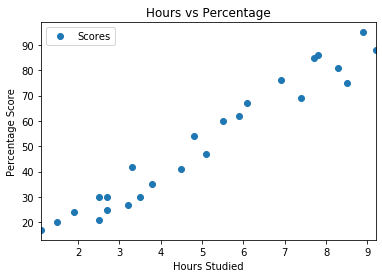

In [5]:
# Now plot the data
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

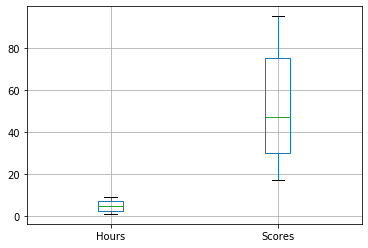

In [7]:
data.boxplot()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

In [13]:
# The next step is to divide the data into (inputs) and (outputs).
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [15]:
#the next step is to split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=0)

## Training the Algorithm

In [17]:
# import LinearRegression
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

In [20]:
#Fit the Values
regressor.fit(x_train, y_train) 

LinearRegression()

#Plot the data

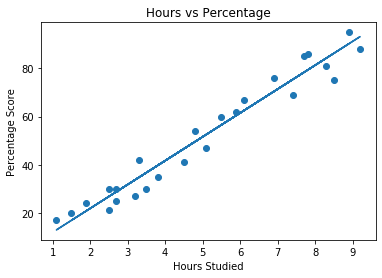

In [23]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(x, line);
plt.show()

## Making Predictions

In [25]:
#it's time to make some predictions.
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
# You can also test with your own data
Hours = 9.25
own_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [46]:
Hours = 1
own_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))
Hours = 99
own_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 1
Predicted Score = 11.92881652207692
No of Hours = 99
Predicted Score = 983.1731516250162


## Evaluating the model And Check the Accuracy of the Model

In [47]:
#The final step is to evaluate the performance of algorithm
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356